# Movie Data Analysis For Microsoft

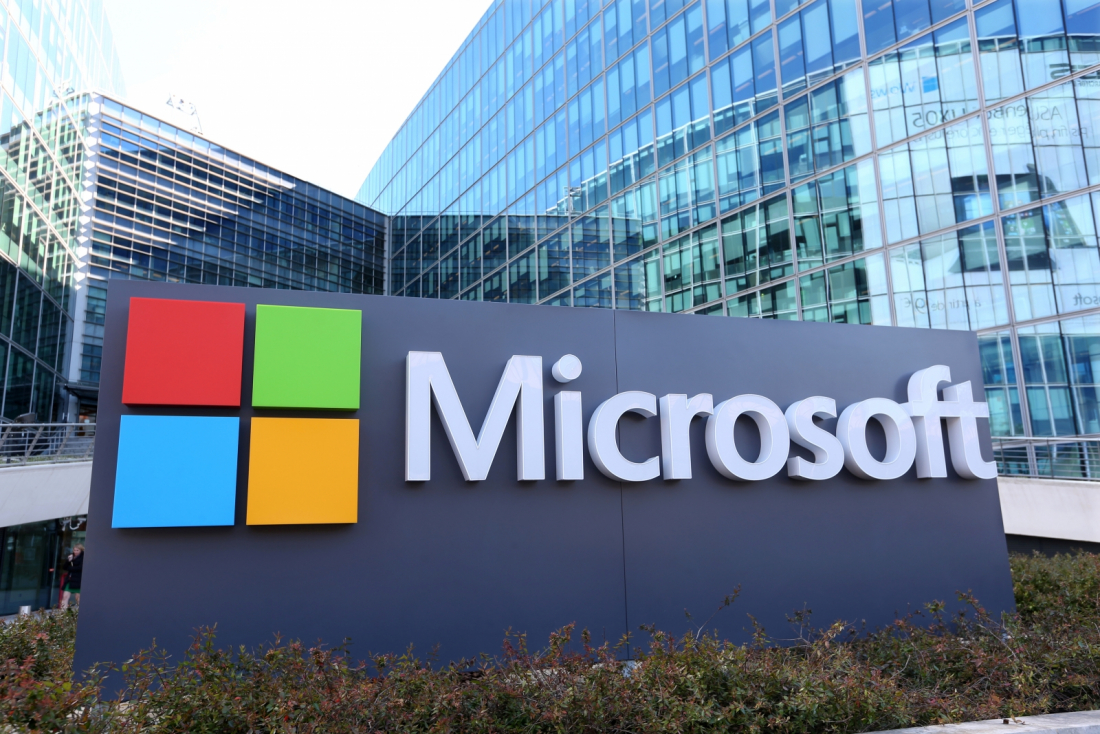

# Overview

This Project analyzes available data on the movie industry in a bid to advice Microsoft on how best to invest in movie production.

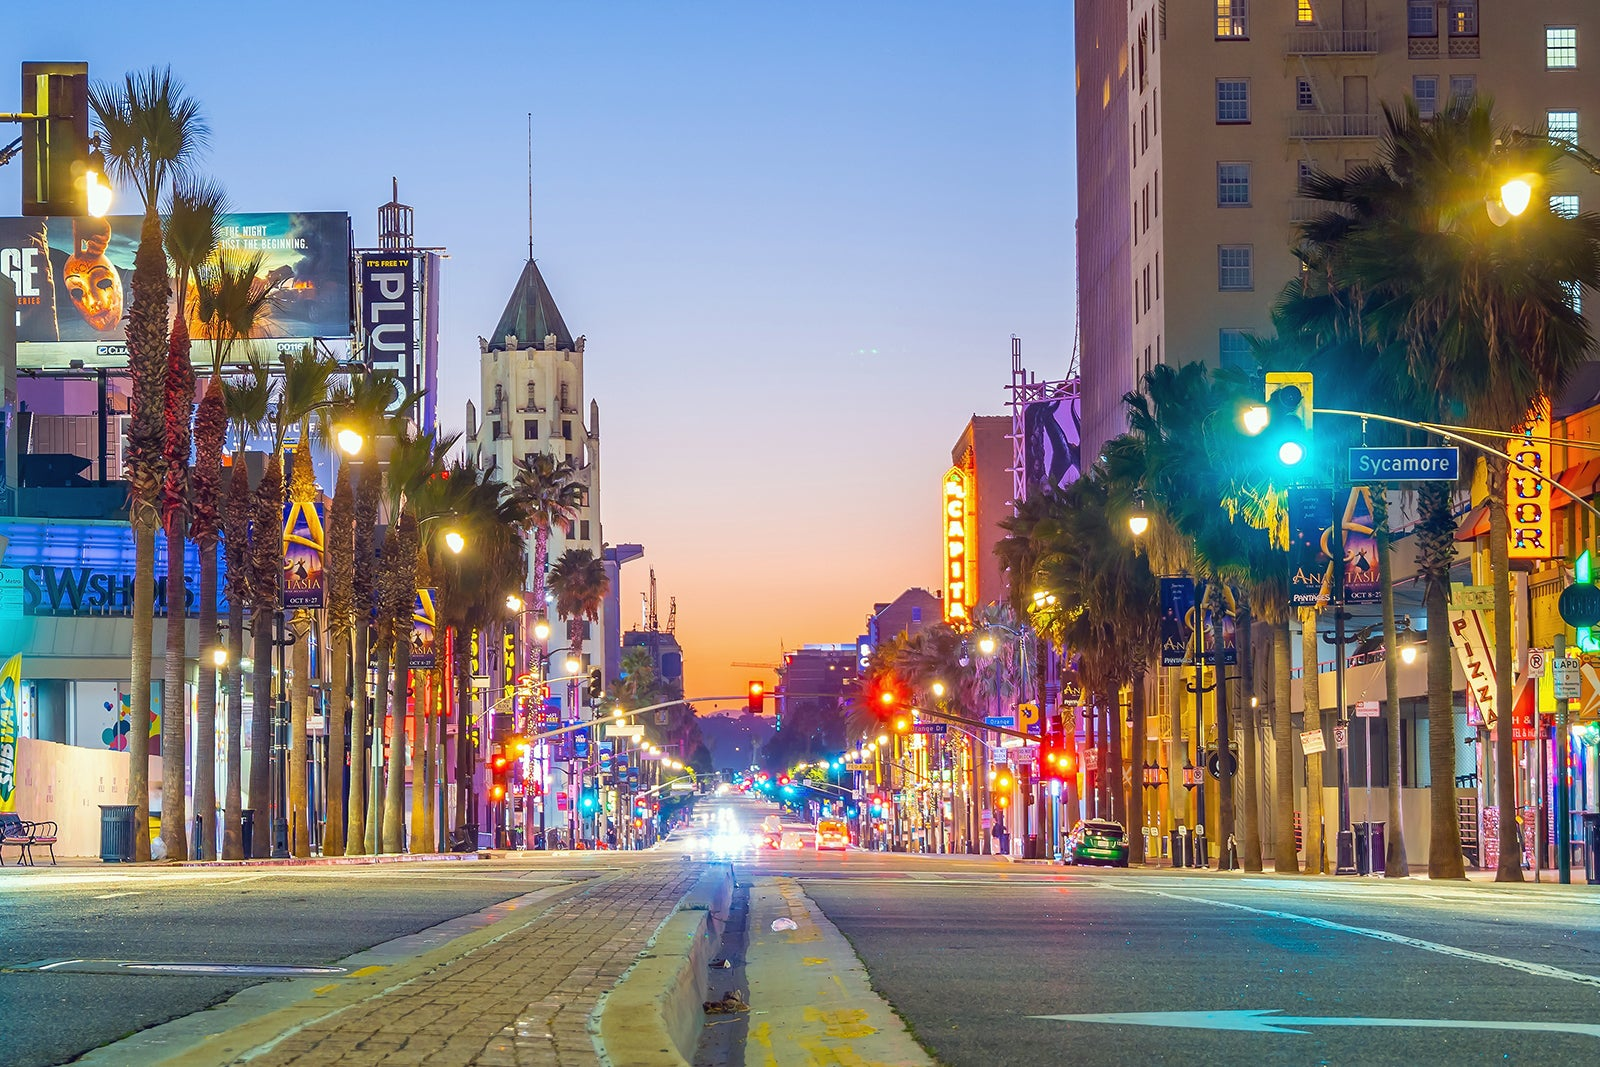

# Business Problem

Microsoft intends to go into the movie production business and with a history of investing profitably in various ventures, would not want this to be different.This project seeks to analyze available data on the movie industry in a bid display different profitable metrics for investors.

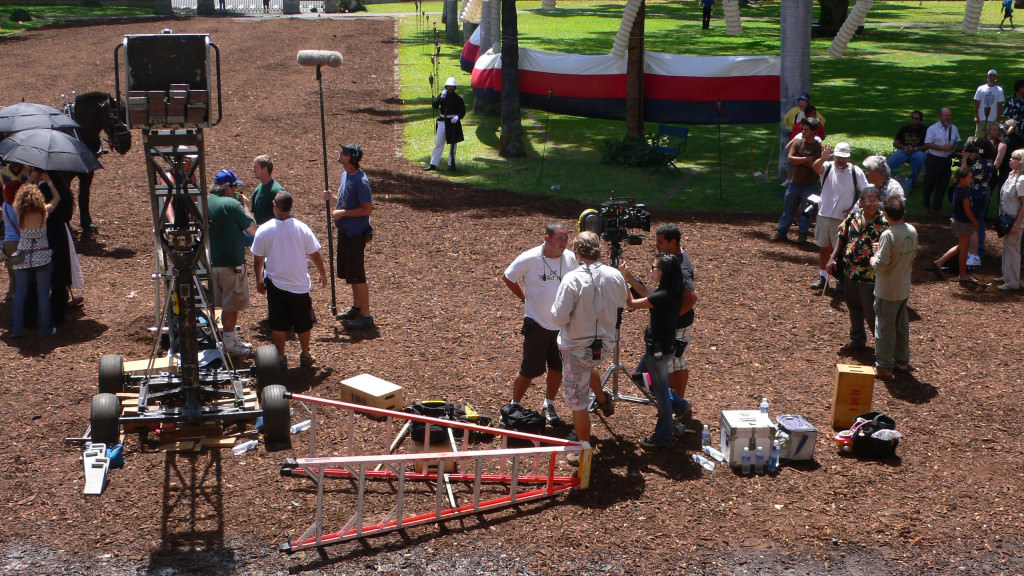

# Data Understanding

The data files present information on various aspects of the movie industry, including production costs, movie ratings, studios and lots more, which with proper analysis will help Microsoft make a decision on how best to go about the investment.

# Data Cleaning

The first step is to import all necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

Read files into Dataframes using the pd.read_csv() function

Proceed to data cleaning(fixing missing data, fixing data types and more)

1) Bom Movie Gross

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

From the above, it is seen that the 'studio', domestic_gross; and 'foreign_gross' columns have missing data.
Check for the percentage of missing values in the columns with missing data

In [5]:
print('Percentage of rows with missing values in foreign_gross:', 
      len(bom_movie_gross[bom_movie_gross.foreign_gross.isna()])/ 
      len(bom_movie_gross) * 100,'%')
print('Number of unique values in foreign_gross:', len(bom_movie_gross.
                                               foreign_gross.unique()))

print('Percentage of rows with missing values in domestic_gross:', 
      len(bom_movie_gross[bom_movie_gross.domestic_gross.isna()])/ 
      len(bom_movie_gross) * 100,'%')
print('Number of unique values in domestic_gross:', len(bom_movie_gross.
                                               domestic_gross.unique()))

print('Percentage of rows with missing values in studio:', 
      len(bom_movie_gross[bom_movie_gross.studio.isna()])/ 
      len(bom_movie_gross) * 100,'%')
print('Number of unique values in studio:', len(bom_movie_gross.
                                               studio.unique()))

Percentage of rows with missing values in foreign_gross: 39.85828166519043 %
Number of unique values in foreign_gross: 1205
Percentage of rows with missing values in domestic_gross: 0.8266902863891349 %
Number of unique values in domestic_gross: 1798
Percentage of rows with missing values in studio: 0.14762326542663123 %
Number of unique values in studio: 258


Since the Foreign_gross column has so many missing values(40%), delete the entire column

In [6]:
bom_movie_gross = bom_movie_gross.drop('foreign_gross', axis = 1)
bom_movie_gross.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


Both domestic_gross and studio columns have less than 1% missing values, hence delete the rows with missing values

In [7]:
bom_movie_gross = bom_movie_gross.dropna()

Check again for missing values

In [8]:
bom_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

Check for the data types in each column

In [9]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [10]:
bom_movie_gross.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


2) rt_movie

In [11]:
rt_movie = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Create a new column called 'genre_lst' to list the genres seperated by '|'

In [12]:
rt_movie['genre_lst'] = rt_movie['genre'].str.split('|')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_lst
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,"[Action and Adventure, Classics, Drama]"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]"
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"[Drama, Musical and Performing Arts]"
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,"[Drama, Mystery and Suspense]"
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,"[Drama, Romance]"


Split the various list of genres in 'genre_lst' to individual genres

In [13]:
rt_movie = rt_movie.explode('genre_lst')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_lst
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Science Fiction and Fantasy


Check for missing values 

In [14]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3581 non-null   int64 
 1   synopsis      3479 non-null   object
 2   rating        3578 non-null   object
 3   genre         3573 non-null   object
 4   director      3138 non-null   object
 5   writer        2560 non-null   object
 6   theater_date  2872 non-null   object
 7   dvd_date      2872 non-null   object
 8   currency      724 non-null    object
 9   box_office    724 non-null    object
 10  runtime       3529 non-null   object
 11  studio        1062 non-null   object
 12  genre_lst     3573 non-null   object
dtypes: int64(1), object(12)
memory usage: 391.7+ KB


In [15]:
rt_movie.isna().sum()

id                 0
synopsis         102
rating             3
genre              8
director         443
writer          1021
theater_date     709
dvd_date         709
currency        2857
box_office      2857
runtime           52
studio          2519
genre_lst          8
dtype: int64

Check for the percentage of missing values in the columns with missing data

In [16]:
print('Number of unique values in synopsis:', len(rt_movie.synopsis.unique()))
print('Percentage of rows with missing values in synopsis:', 
      len(rt_movie[rt_movie.synopsis.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in rating:', len(rt_movie.rating.unique()))
print('Percentage of rows with missing values in rating:', 
      len(rt_movie[rt_movie.rating.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in director:', len(rt_movie.director.unique()))
print('Percentage of rows with missing values in director:', 
      len(rt_movie[rt_movie.director.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in writer:', len(rt_movie.writer.unique()))
print('Percentage of rows with missing values in writer:', 
      len(rt_movie[rt_movie.writer.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in theater_date:', len(rt_movie.theater_date.unique()))
print('Percentage of rows with missing values in theater_date:', 
      len(rt_movie[rt_movie.theater_date.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in dvd_date:', len(rt_movie.dvd_date.unique()))
print('Percentage of rows with missing values in dvd_date:', 
      len(rt_movie[rt_movie.dvd_date.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in currency:', len(rt_movie.currency.unique()))
print('Percentage of rows with missing values in currency:', 
      len(rt_movie[rt_movie.currency.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in box_office:', len(rt_movie.box_office.unique()))
print('Percentage of rows with missing values in box_office:', 
      len(rt_movie[rt_movie.box_office.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in runtime:', len(rt_movie.runtime.unique()))
print('Percentage of rows with missing values in runtime:', 
      len(rt_movie[rt_movie.runtime.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in studio:', len(rt_movie.studio.unique()))
print('Percentage of rows with missing values in studio:', 
      len(rt_movie[rt_movie.studio.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in genre_lst:', len(rt_movie.genre_lst.unique()))
print('Percentage of rows with missing values in genre_lst:', 
      len(rt_movie[rt_movie.genre_lst.isna()])/len(rt_movie) * 100,'%')

Number of unique values in synopsis: 1498
Percentage of rows with missing values in synopsis: 2.8483663781066744 %
Number of unique values in rating: 7
Percentage of rows with missing values in rating: 0.08377548170901983 %
Number of unique values in director: 1126
Percentage of rows with missing values in director: 12.37084613236526 %
Number of unique values in writer: 1070
Percentage of rows with missing values in writer: 28.51158894163641 %
Number of unique values in theater_date: 1026
Percentage of rows with missing values in theater_date: 19.798938843898352 %
Number of unique values in dvd_date: 718
Percentage of rows with missing values in dvd_date: 19.798938843898352 %
Number of unique values in currency: 2
Percentage of rows with missing values in currency: 79.78218374755654 %
Number of unique values in box_office: 337
Percentage of rows with missing values in box_office: 79.78218374755654 %
Number of unique values in runtime: 143
Percentage of rows with missing values in runti

Drop all columns with missing values > 30%: 'currency', 'box_office' and 'studio'

In [17]:
rt_movie = rt_movie.drop('studio', axis = 1)

In [18]:
rt_movie = rt_movie.drop('currency', axis = 1)

In [19]:
rt_movie = rt_movie.drop('box_office', axis = 1)

For columns with missing values >= 10% and <= 30%, raplace NaN with missing; 'director', 'writer', 'theater_date'and 'dvd_date'

In [20]:
rt_movie['director'] = rt_movie['director'].fillna('missing')

In [21]:
rt_movie['writer'] = rt_movie['writer'].fillna('missing')

In [22]:
rt_movie['theater_date'] = rt_movie['theater_date'].fillna('missing')

In [23]:
rt_movie['dvd_date'] = rt_movie['dvd_date'].fillna('missing')

For columns with missing values < 10%, delete the rows with missing values; 'rating', 'runtime' and 'genre_lst'

In [24]:
rt_movie = rt_movie.dropna()

Check for missing values

In [25]:
rt_movie.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
genre_lst       0
dtype: int64

In [26]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_lst
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


Create a new column called 'genre_lst' to list the genres seperated by 'and'

In [27]:
rt_movie['genre_list'] = rt_movie['genre_lst'].str.split('and')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_lst,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure,"[Action , Adventure]"
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics,[Classics]
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama,[Drama]
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama,[Drama]
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy,"[Science Fiction , Fantasy]"


Split the various list of genres in 'genre_list' to individual genres

In [28]:
rt_movie = rt_movie.explode('genre_list')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_lst,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure,Action
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure,Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama,Drama


Delete the 'genre' and genre_lst' columns

In [29]:
rt_movie = rt_movie.drop('genre', axis = 1)

In [30]:
rt_movie = rt_movie.drop('genre_lst', axis = 1)

In [31]:
rt_movie.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama


3) movie_budgets

In [32]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Check for missing values and dtypes

In [33]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are no missing values in the above Dataframe, however, the values in 'production_budget', 'domestic_gross' and 'foreign_gross' are 'object' types. 

These have to be converted to 'floats'.

In [34]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(lambda x: x.strip('$')
                                                                              .replace(',','')).astype(float)

In [35]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(lambda x: x.strip('$').replace(',','')).astype(float)

In [36]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(lambda x: x.strip('$').replace(',','')).astype(float)

Check for dtypes

In [37]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Create two new columns, one to represent;

total gross = domestic_gross + worldwide_gross

Return on Investment (ROI) = total_gross - production_budget

In [38]:
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']

In [39]:
movie_budgets['ROI'] = movie_budgets['total_gross'] - movie_budgets['production_budget']

In [40]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,1.619903e+09


# Data Analysis

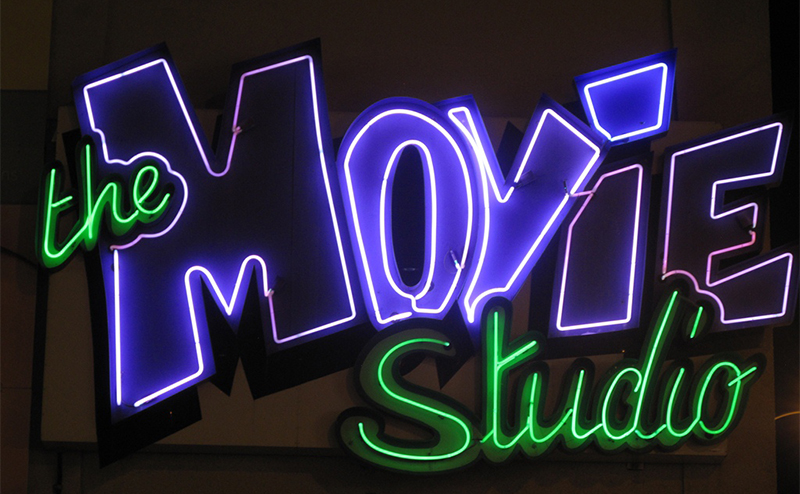



# Top Studios

Merge the 'bom_movie_gross' and 'movie_budgets' dataframes

In [41]:
stud = bom_movie_gross.merge(movie_budgets, how='inner', left_on='domestic_gross', right_on='domestic_gross')
stud.head()

,title,studio,domestic_gross,year,id,release_date,movie,production_budget,worldwide_gross,total_gross,ROI
0,Unstoppable,Fox,81600000.0,2010,89,"Jan 1, 1970",M*A*S*H,3500000.0,81600000.0,163200000.0,159700000.0
1,Dear John,SGem,80000000.0,2010,61,"Feb 17, 1984",Footloose,8200000.0,80000000.0,160000000.0,151800000.0
2,Dinner for Schmucks,P/DW,73000000.0,2010,8,"Nov 18, 1959",Ben-Hur,15000000.0,73259017.0,146259017.0,131259017.0
3,Justin Bieber: Never Say Never,Par.,73000000.0,2011,8,"Nov 18, 1959",Ben-Hur,15000000.0,73259017.0,146259017.0,131259017.0
4,Piranha 3D,W/Dim.,25000000.0,2010,3,"Jan 1, 1976",Logan's Run,7000000.0,25000000.0,50000000.0,43000000.0


Group the dataframe by 'studio' and find the average values of the numerical data

In [42]:
stud = stud.groupby('studio').mean()
stud.head()

,domestic_gross,year,id,production_budget,worldwide_gross,total_gross,ROI
studio,,,,,,,
3D,6.100000e+06,2010.000000,64.000000,1.200000e+06,6.100000e+06,1.220000e+07,1.100000e+07
A24,3.478947e+06,2015.526316,54.263158,1.485721e+07,4.342105e+06,7.821053e+06,-7.036158e+06
AF,1.000000e+06,2012.000000,36.000000,1.050000e+07,1.000000e+06,2.000000e+06,-8.500000e+06
ATO,1.000000e+06,2010.000000,36.000000,1.050000e+07,1.000000e+06,2.000000e+06,-8.500000e+06
Amazon,3.700000e+06,2018.000000,31.666667,1.175000e+06,3.700000e+06,7.400000e+06,6.225000e+06


Sort the values according to decreasing value of 'ROI'

In [43]:
studios = stud.sort_values(by='ROI', ascending=False)
studios.head()

,domestic_gross,year,id,production_budget,worldwide_gross,total_gross,ROI
studio,,,,,,,
P/DW,7.300000e+07,2010.000000,8.000000,1.500000e+07,7.325902e+07,1.462590e+08,1.312590e+08
WB (NL),4.638000e+07,2014.600000,70.400000,6.862849e+06,8.594000e+07,1.323200e+08,1.254572e+08
BV,3.400000e+07,2016.000000,25.500000,2.100000e+07,8.626201e+07,1.202620e+08,9.926201e+07
Over.,3.910000e+07,2010.000000,59.000000,1.000000e+07,5.010000e+07,8.920000e+07,7.920000e+07
Uni.,2.664348e+07,2014.130435,40.652174,1.212989e+07,4.643721e+07,7.308068e+07,6.095079e+07


Get the first 20 studios with the highest ROI average

In [44]:
top_twenty_studios = studios[:20]
top_twenty_studios

,domestic_gross,year,id,production_budget,worldwide_gross,total_gross,ROI
studio,,,,,,,
P/DW,7.300000e+07,2010.000000,8.000000,1.500000e+07,7.325902e+07,1.462590e+08,1.312590e+08
WB (NL),4.638000e+07,2014.600000,70.400000,6.862849e+06,8.594000e+07,1.323200e+08,1.254572e+08
BV,3.400000e+07,2016.000000,25.500000,2.100000e+07,8.626201e+07,1.202620e+08,9.926201e+07
Over.,3.910000e+07,2010.000000,59.000000,1.000000e+07,5.010000e+07,8.920000e+07,7.920000e+07
Uni.,2.664348e+07,2014.130435,40.652174,1.212989e+07,4.643721e+07,7.308068e+07,6.095079e+07
SGem,3.475000e+07,2011.750000,45.750000,1.780000e+07,3.825000e+07,7.300000e+07,5.520000e+07
Fox,1.832353e+07,2013.235294,52.823529,7.659235e+06,3.411532e+07,5.243885e+07,4.477961e+07
Par.,1.958000e+07,2014.800000,45.733333,1.637100e+07,3.839995e+07,5.797995e+07,4.160896e+07
Rela.,1.753636e+07,2012.818182,49.909091,6.241713e+06,2.693793e+07,4.447430e+07,3.823258e+07


Delete unwanted columns

In [45]:
top_twenty_studios = top_twenty_studios.drop('domestic_gross', axis = 1)

In [46]:
top_twenty_studios = top_twenty_studios.drop('year', axis = 1)

In [47]:
top_twenty_studios = top_twenty_studios.drop('worldwide_gross', axis = 1)

In [48]:
top_twenty_studios = top_twenty_studios.drop('total_gross', axis = 1)

In [49]:
top_twenty_studios = top_twenty_studios.drop('production_budget', axis = 1)

In [50]:
top_twenty_studios = top_twenty_studios.drop('id', axis = 1)

In [51]:
top_twenty_studios

,ROI
studio,
P/DW,1.312590e+08
WB (NL),1.254572e+08
BV,9.926201e+07
Over.,7.920000e+07
Uni.,6.095079e+07
SGem,5.520000e+07
Fox,4.477961e+07
Par.,4.160896e+07
Rela.,3.823258e+07


Plot a Bar Chart to help visualize the above comparison

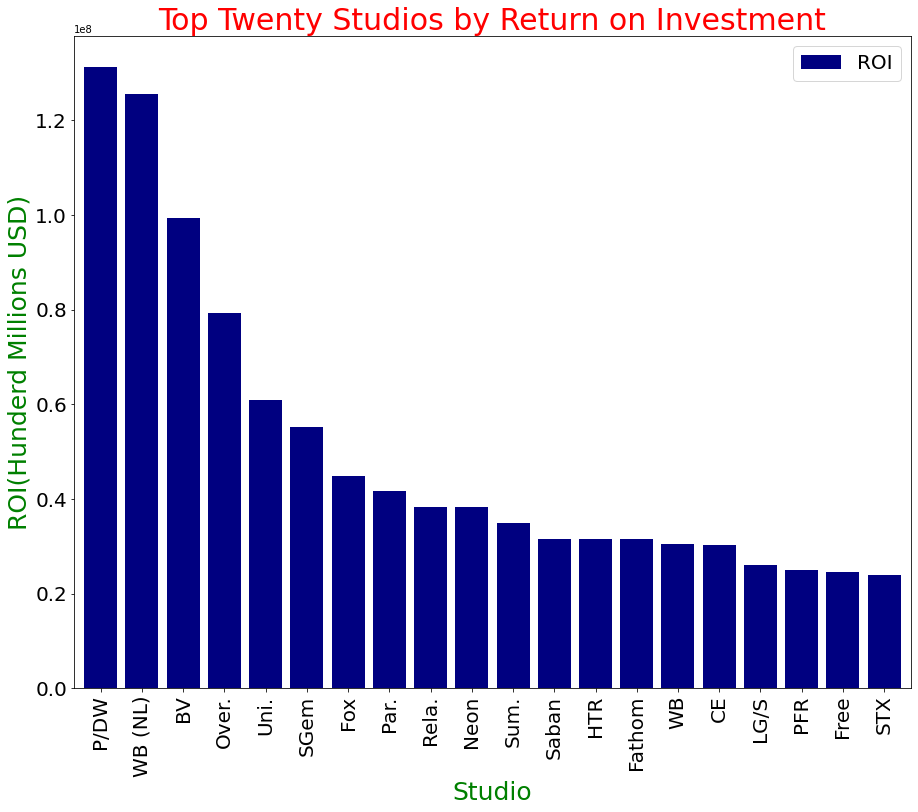

<Figure size 432x288 with 0 Axes>

In [52]:
top_twenty_studios.plot.bar(figsize=(15, 12), width=.8, color='navy')
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Top Twenty Studios by Return on Investment', fontsize='30', color='red')
plt.xlabel('Studio', fontsize='25', color='green')
plt.ylabel('ROI(Hunderd Millions USD)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();
plt.savefig('Top Twenty Studios.pdf', bbox_inches='tight', dpi=300)

# Top Directors

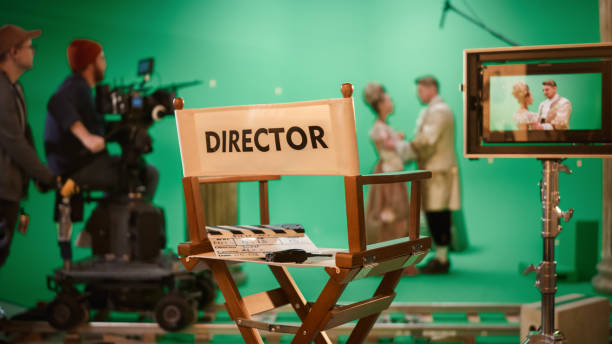

Merge the 'rt_movie' and 'movie_budgets' Dataframes

In [53]:
direct = movie_budgets.merge(rt_movie, how='inner', left_on='id', right_on='id')
direct.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,ROI,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
1,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Adventure
2,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
3,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
4,1,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,1.024468e+09,8.494675e+08,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action


Group the dataframe by 'director' and find the average values of the numerical data

In [54]:
direct = direct.groupby('director').mean()
direct.head()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
director,,,,,,
Alan Alda,71.0,3.027216e+07,4.214399e+07,8.887686e+07,1.310208e+08,1.007487e+08
Alan Hale,98.0,2.995821e+07,3.844114e+07,8.587932e+07,1.243205e+08,9.436225e+07
Allen Hughes|Albert Hughes,56.0,3.083160e+07,4.798312e+07,1.139748e+08,1.619579e+08,1.311263e+08
Allison Anders,5.0,3.472362e+07,4.948760e+07,1.054566e+08,1.549442e+08,1.202206e+08
Anatole Litvak,68.0,3.034490e+07,5.054890e+07,1.164315e+08,1.669804e+08,1.366355e+08


Sort the data by decreasing order of 'ROI'

In [55]:
director = direct.sort_values(by='ROI', ascending=False)
director.head()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
director,,,,,,
Jim Jarmusch,26.0,3.251336e+07,5.695159e+07,1.316875e+08,1.886391e+08,1.561258e+08
William Wellman,43.0,3.134081e+07,5.311426e+07,1.340050e+08,1.871192e+08,1.557784e+08
Carl Erik Rinsch,25.0,3.255309e+07,5.186605e+07,1.240177e+08,1.758838e+08,1.433307e+08
Anatole Litvak,68.0,3.034490e+07,5.054890e+07,1.164315e+08,1.669804e+08,1.366355e+08
Roy Ward Baker,38.0,3.158974e+07,5.346198e+07,1.123490e+08,1.658109e+08,1.342212e+08


Get the first 20 directors with the highest ROI average

In [56]:
top_twenty_directors = director[:20]
top_twenty_directors

,id,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
director,,,,,,
Jim Jarmusch,26.0,3.251336e+07,5.695159e+07,1.316875e+08,1.886391e+08,1.561258e+08
William Wellman,43.0,3.134081e+07,5.311426e+07,1.340050e+08,1.871192e+08,1.557784e+08
Carl Erik Rinsch,25.0,3.255309e+07,5.186605e+07,1.240177e+08,1.758838e+08,1.433307e+08
Anatole Litvak,68.0,3.034490e+07,5.054890e+07,1.164315e+08,1.669804e+08,1.366355e+08
Roy Ward Baker,38.0,3.158974e+07,5.346198e+07,1.123490e+08,1.658109e+08,1.342212e+08
Allen Hughes|Albert Hughes,56.0,3.083160e+07,4.798312e+07,1.139748e+08,1.619579e+08,1.311263e+08
Bill Froehlich,60.0,3.071319e+07,5.012949e+07,1.112841e+08,1.614136e+08,1.307004e+08
Barry Levinson,6.0,3.449806e+07,5.244219e+07,1.125342e+08,1.649764e+08,1.304783e+08
Pat Proft,64.0,3.052102e+07,4.777412e+07,1.089697e+08,1.567438e+08,1.262228e+08


Remove all unwanted columns

In [57]:
top_twenty_directors = top_twenty_directors.drop('domestic_gross', axis = 1)

In [58]:
top_twenty_directors = top_twenty_directors.drop('worldwide_gross', axis = 1)

In [59]:
top_twenty_directors = top_twenty_directors.drop('total_gross', axis = 1)

In [60]:
top_twenty_directors = top_twenty_directors.drop('production_budget', axis = 1)

In [61]:
top_twenty_directors = top_twenty_directors.drop('id', axis = 1)

In [62]:
top_twenty_directors

,ROI
director,
Jim Jarmusch,1.561258e+08
William Wellman,1.557784e+08
Carl Erik Rinsch,1.433307e+08
Anatole Litvak,1.366355e+08
Roy Ward Baker,1.342212e+08
Allen Hughes|Albert Hughes,1.311263e+08
Bill Froehlich,1.307004e+08
Barry Levinson,1.304783e+08
Pat Proft,1.262228e+08


Plot a Bar Chart to help visualize the above comparison

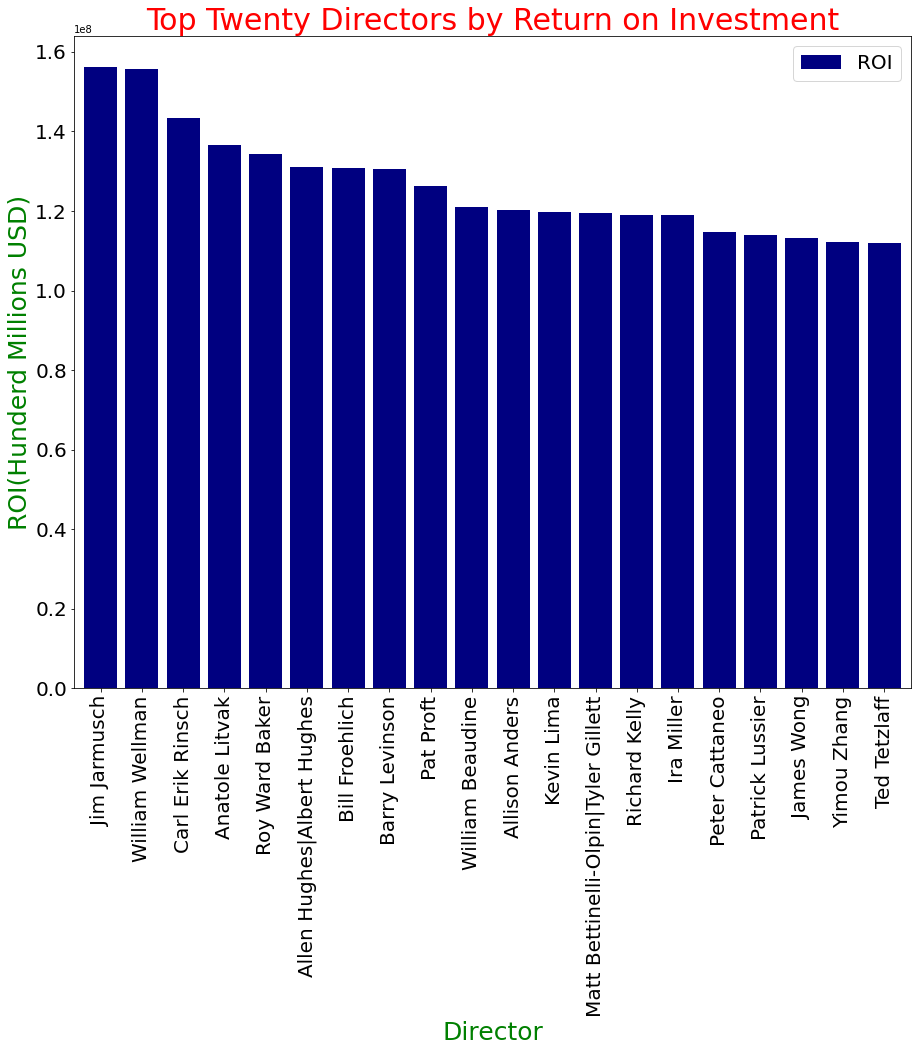

In [63]:
top_twenty_directors.plot.bar(figsize=(15, 12), width=.8, stacked=True, color=('navy'))
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Top Twenty Directors by Return on Investment', fontsize='30', color='red')
plt.xlabel('Director', fontsize='25', color='green')
plt.ylabel('ROI(Hunderd Millions USD)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

# Top Movie Genres

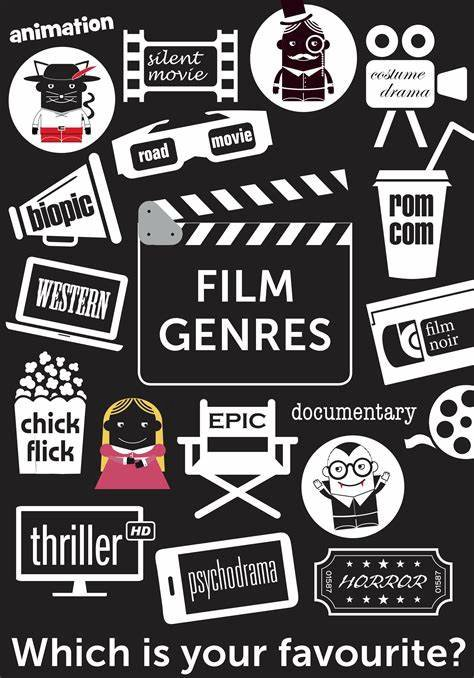

Using the already merged Dataframe 'direct', group the dataframe by 'genre_list' and find the average values of the numerical data

In [64]:
gen = movie_budgets.merge(rt_movie, how='inner', left_on='id', right_on='id')
gen.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,ROI,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
1,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Adventure
2,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
3,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.111853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
4,1,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,1.024468e+09,8.494675e+08,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action


In [65]:
gen = gen.groupby('genre_list').mean()
gen.head()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
genre_list,,,,,,
Adventure,47.631579,3.154294e+07,4.191989e+07,9.077010e+07,1.326900e+08,1.011470e+08
Family,50.108225,3.164530e+07,4.318121e+07,9.417847e+07,1.373597e+08,1.057144e+08
Fantasy,34.833333,3.239140e+07,4.245004e+07,9.488473e+07,1.373348e+08,1.049434e+08
Fitness,95.000000,3.010175e+07,3.571045e+07,7.324444e+07,1.089549e+08,7.885314e+07
International,67.828784,3.076802e+07,4.408969e+07,9.196056e+07,1.360503e+08,1.052822e+08


Sort the data by decreasing order of 'ROI'

In [66]:
genre = gen.sort_values(by='ROI', ascending=False)
genre.head()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
genre_list,,,,,,
Horror,59.406340,3.084441e+07,4.712231e+07,1.011095e+08,1.482318e+08,1.173874e+08
Performing Arts,51.509761,3.160773e+07,4.694775e+07,1.019574e+08,1.489051e+08,1.172974e+08
Musical,51.509761,3.160773e+07,4.694775e+07,1.019574e+08,1.489051e+08,1.172974e+08
Classics,49.551903,3.173234e+07,4.614555e+07,1.027072e+08,1.488527e+08,1.171204e+08
Family,50.108225,3.164530e+07,4.318121e+07,9.417847e+07,1.373597e+08,1.057144e+08


Delete all unwanted columns

In [67]:
genre = genre.drop('domestic_gross', axis = 1)

In [68]:
genre = genre.drop('worldwide_gross', axis = 1)

In [69]:
genre = genre.drop('total_gross', axis = 1)

In [70]:
genre = genre.drop('id', axis = 1)

In [71]:
genre = genre.drop('production_budget', axis = 1)

In [72]:
genre

,ROI
genre_list,
Horror,1.173874e+08
Performing Arts,1.172974e+08
Musical,1.172974e+08
Classics,1.171204e+08
Family,1.057144e+08
Kids,1.057144e+08
Art House,1.052822e+08
International,1.052822e+08
Fantasy,1.049434e+08


Plot a Bar Chart to visualize the above comparison

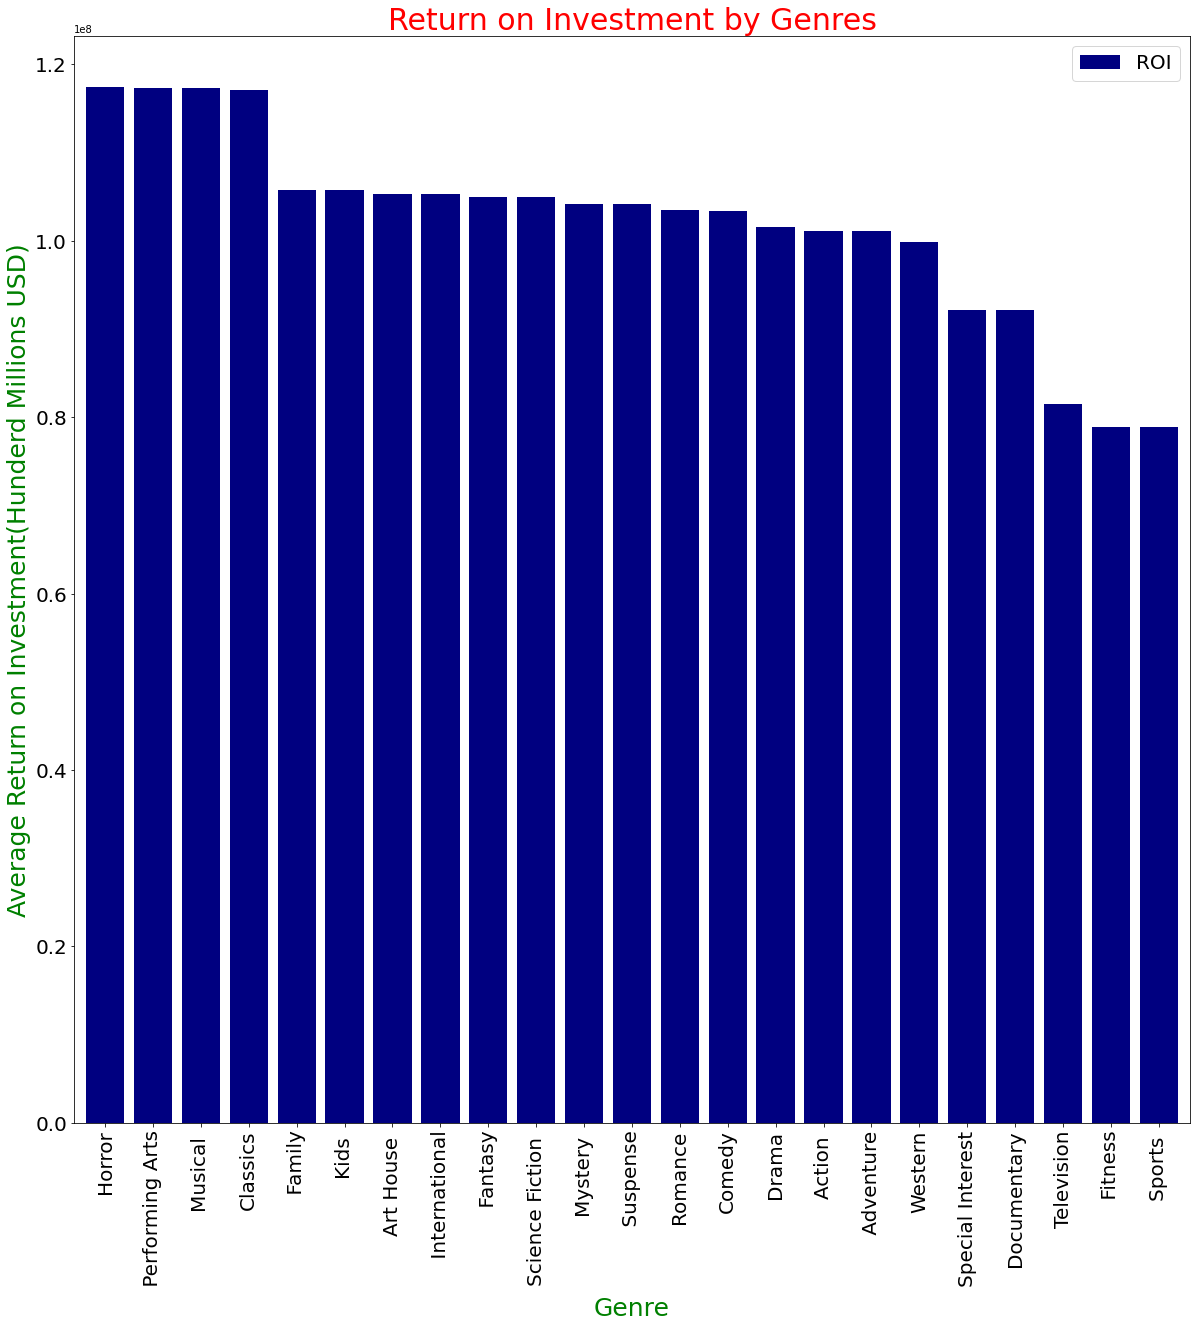

In [73]:
genre.plot.bar(figsize=(20, 20), width=.8, color='navy')
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Return on Investment by Genres', fontsize='30', color='red')
plt.xlabel('Genre', fontsize='25', color='green')
plt.ylabel('Average Return on Investment(Hunderd Millions USD)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

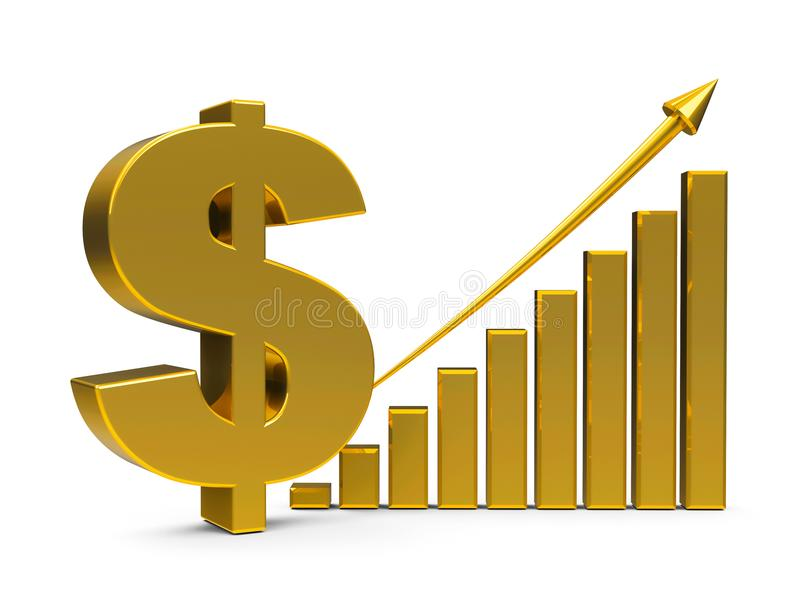

# Conclusion

This analysis leads to three suggestions for possible matrices to be considered by Microsoft to ensure profitability of investments:

    1) The Production Studio 
    
    2) The Director 
    
    3) The Movie Genre
